# Supervised Learning - Project 2 - Thera Bank

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Introduction to Dataset

The file contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Attribute Information

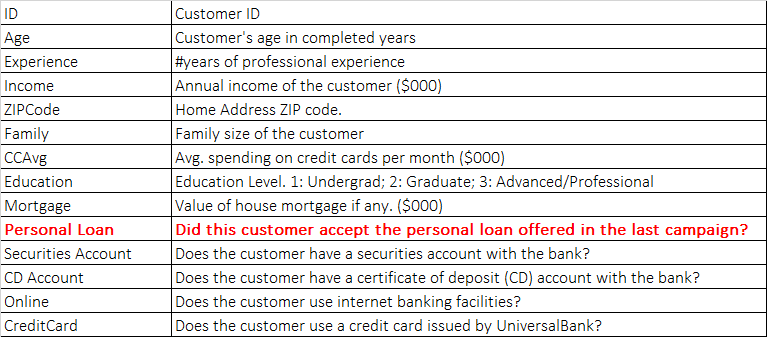

## Importing Key Modules

In [27]:
# Importing Basic Libraries
import numpy as np
import pandas as pd

# Import Data-visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Stats Libraries
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency

# Import Model building Libraries
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes

# Import Libraries for Train-Test split, Scaling,Label encoder and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

## Loading Dataset

per_loan -> Customer response dataset for last personal loan campaign.

In [28]:
# Loading Dataset
per_loan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
per_loan.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
# Shape of Thera Bank Personal Loan Dataset
print("Number of Rows:",per_loan.shape[0],"\n")
print("Number of Columns:",per_loan.shape[1])

Number of Rows: 5000 

Number of Columns: 14


## Data Pre - Processing

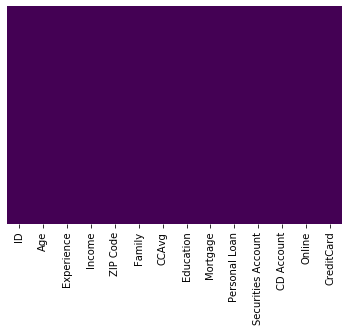

In [30]:
#Missing Values data visualization
sns.heatmap(per_loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Inference: There are no missing values

In [31]:
# Checking for object/string values:
per_loan[~per_loan[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']].applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Inference: Data does not contain any object type value

## #1 Read the column description and ensure you understand each attribute well

In [32]:
# 1.1 Checking datatypes 
per_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Inference: ZIP Code and Education are int64 but logically these are categorical variables hence the datatype should be object. Also - Personal Loan, Security Accounts, CD Account, Online and CreditCard are int64 with binary values - we will keep these as they are.

In [33]:
# 1.2 Assigning appropriate datatype to attributes

per_loan['ID'] = per_loan['ID'].astype(object)
per_loan['ZIP Code'] = per_loan['ZIP Code'].astype(object)
per_loan['Education'] = per_loan['Education'].astype(object)

# 1.3 Rechecking the assigned datatypes
per_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null object
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null object
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 547.0+ KB


In [34]:
# 1.4 Understanding the numeric attribute through describe function
round(per_loan.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


Inference: Experience min value is -3 years. This is logically incorrect. We will clean the data.

In [35]:
# 1.5 Looking for error related to negative values
(per_loan < 0).astype(int).sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

Inference: 52 entries in Experience have negative values. If we remove these value, we will lose 1.04% data from total. We will try to replace these entries with mean, median, mode or any other logical entry which will not affect our data much

In [36]:
# 1.6 Replace negative values in Experience with Median

# 1.6.1 Create Copy of Dataset named as 'loan'
loan = per_loan.copy(deep=True)
loan[loan['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [37]:
# 1.6.2 Replace negative values with Median
loan[loan < 0] = np.nan # Converting to NaN
loan['Experience'] = loan['Experience'].fillna(loan['Experience'].median()).astype(int) # imputing nan with median

# 1.6.3 Verify if there are any other negative values left
(loan < 0).astype(int).sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

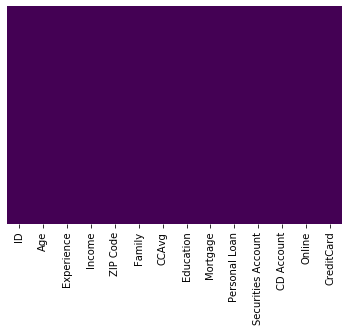

In [38]:
# 1.6.5 Verify if any missing values
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Inference: Verified data, removed negative values with median, assigned appropriate datatype to some variables

In [39]:
# 1.7 Convert the categorical variable - Education Level into Dummy Variable

EL = pd.get_dummies(loan['Education'],prefix = "EL",prefix_sep = "_",drop_first = False)
loan.drop(['Education'],axis = 1,inplace = True)
loan = pd.concat([loan,EL],axis=1)

loan.head()
# Also dropping the original education column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EL_1,EL_2,EL_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [40]:
# 1.8 Label Encoding of categorical variable - ZIP Code

labelencoder = LabelEncoder()
loan['ZIP Code'] = labelencoder.fit_transform(loan['ZIP Code'])

loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EL_1,EL_2,EL_3
0,1,25,1,49,83,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,34,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,367,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,298,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,96,4,1.0,0,0,0,0,0,1,0,1,0


In [41]:
# 1.9 Recheck the datatypes
loan.dtypes

ID                     object
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
EL_1                    uint8
EL_2                    uint8
EL_3                    uint8
dtype: object

## #2 Study the data distribution in each attribute, share your findings.

### Univariate Analysis

In [42]:
# 2.01 Understand numeric attributes through describe function
round(loan.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.33,11.25,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,239.66,130.85,0.0,131.0,254.0,352.0,466.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


In [43]:
# 2.02 Check Skewness
loan.skew()

ID                    0.000000
Age                  -0.029341
Experience           -0.014100
Income                0.841339
ZIP Code             -0.132294
Family                0.155221
CCAvg                 1.598443
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
EL_1                  0.327603
EL_2                  0.976940
EL_3                  0.872094
dtype: float64

In [44]:
# 2.03 Check Kurtosis
loan.kurtosis()

ID                    -1.200000
Age                   -1.153067
Experience            -1.115685
Income                -0.044244
ZIP Code              -1.175994
Family                -1.403586
CCAvg                  2.646706
Mortgage               4.756797
Personal Loan          5.529589
Securities Account     4.701013
CD Account            11.633404
Online                -1.844883
CreditCard            -1.182191
EL_1                  -1.893434
EL_2                  -1.046007
EL_3                  -1.239948
dtype: float64

Inference: Skewness and Kurtosis are present for numeric attributes

### Bivariate Analysis

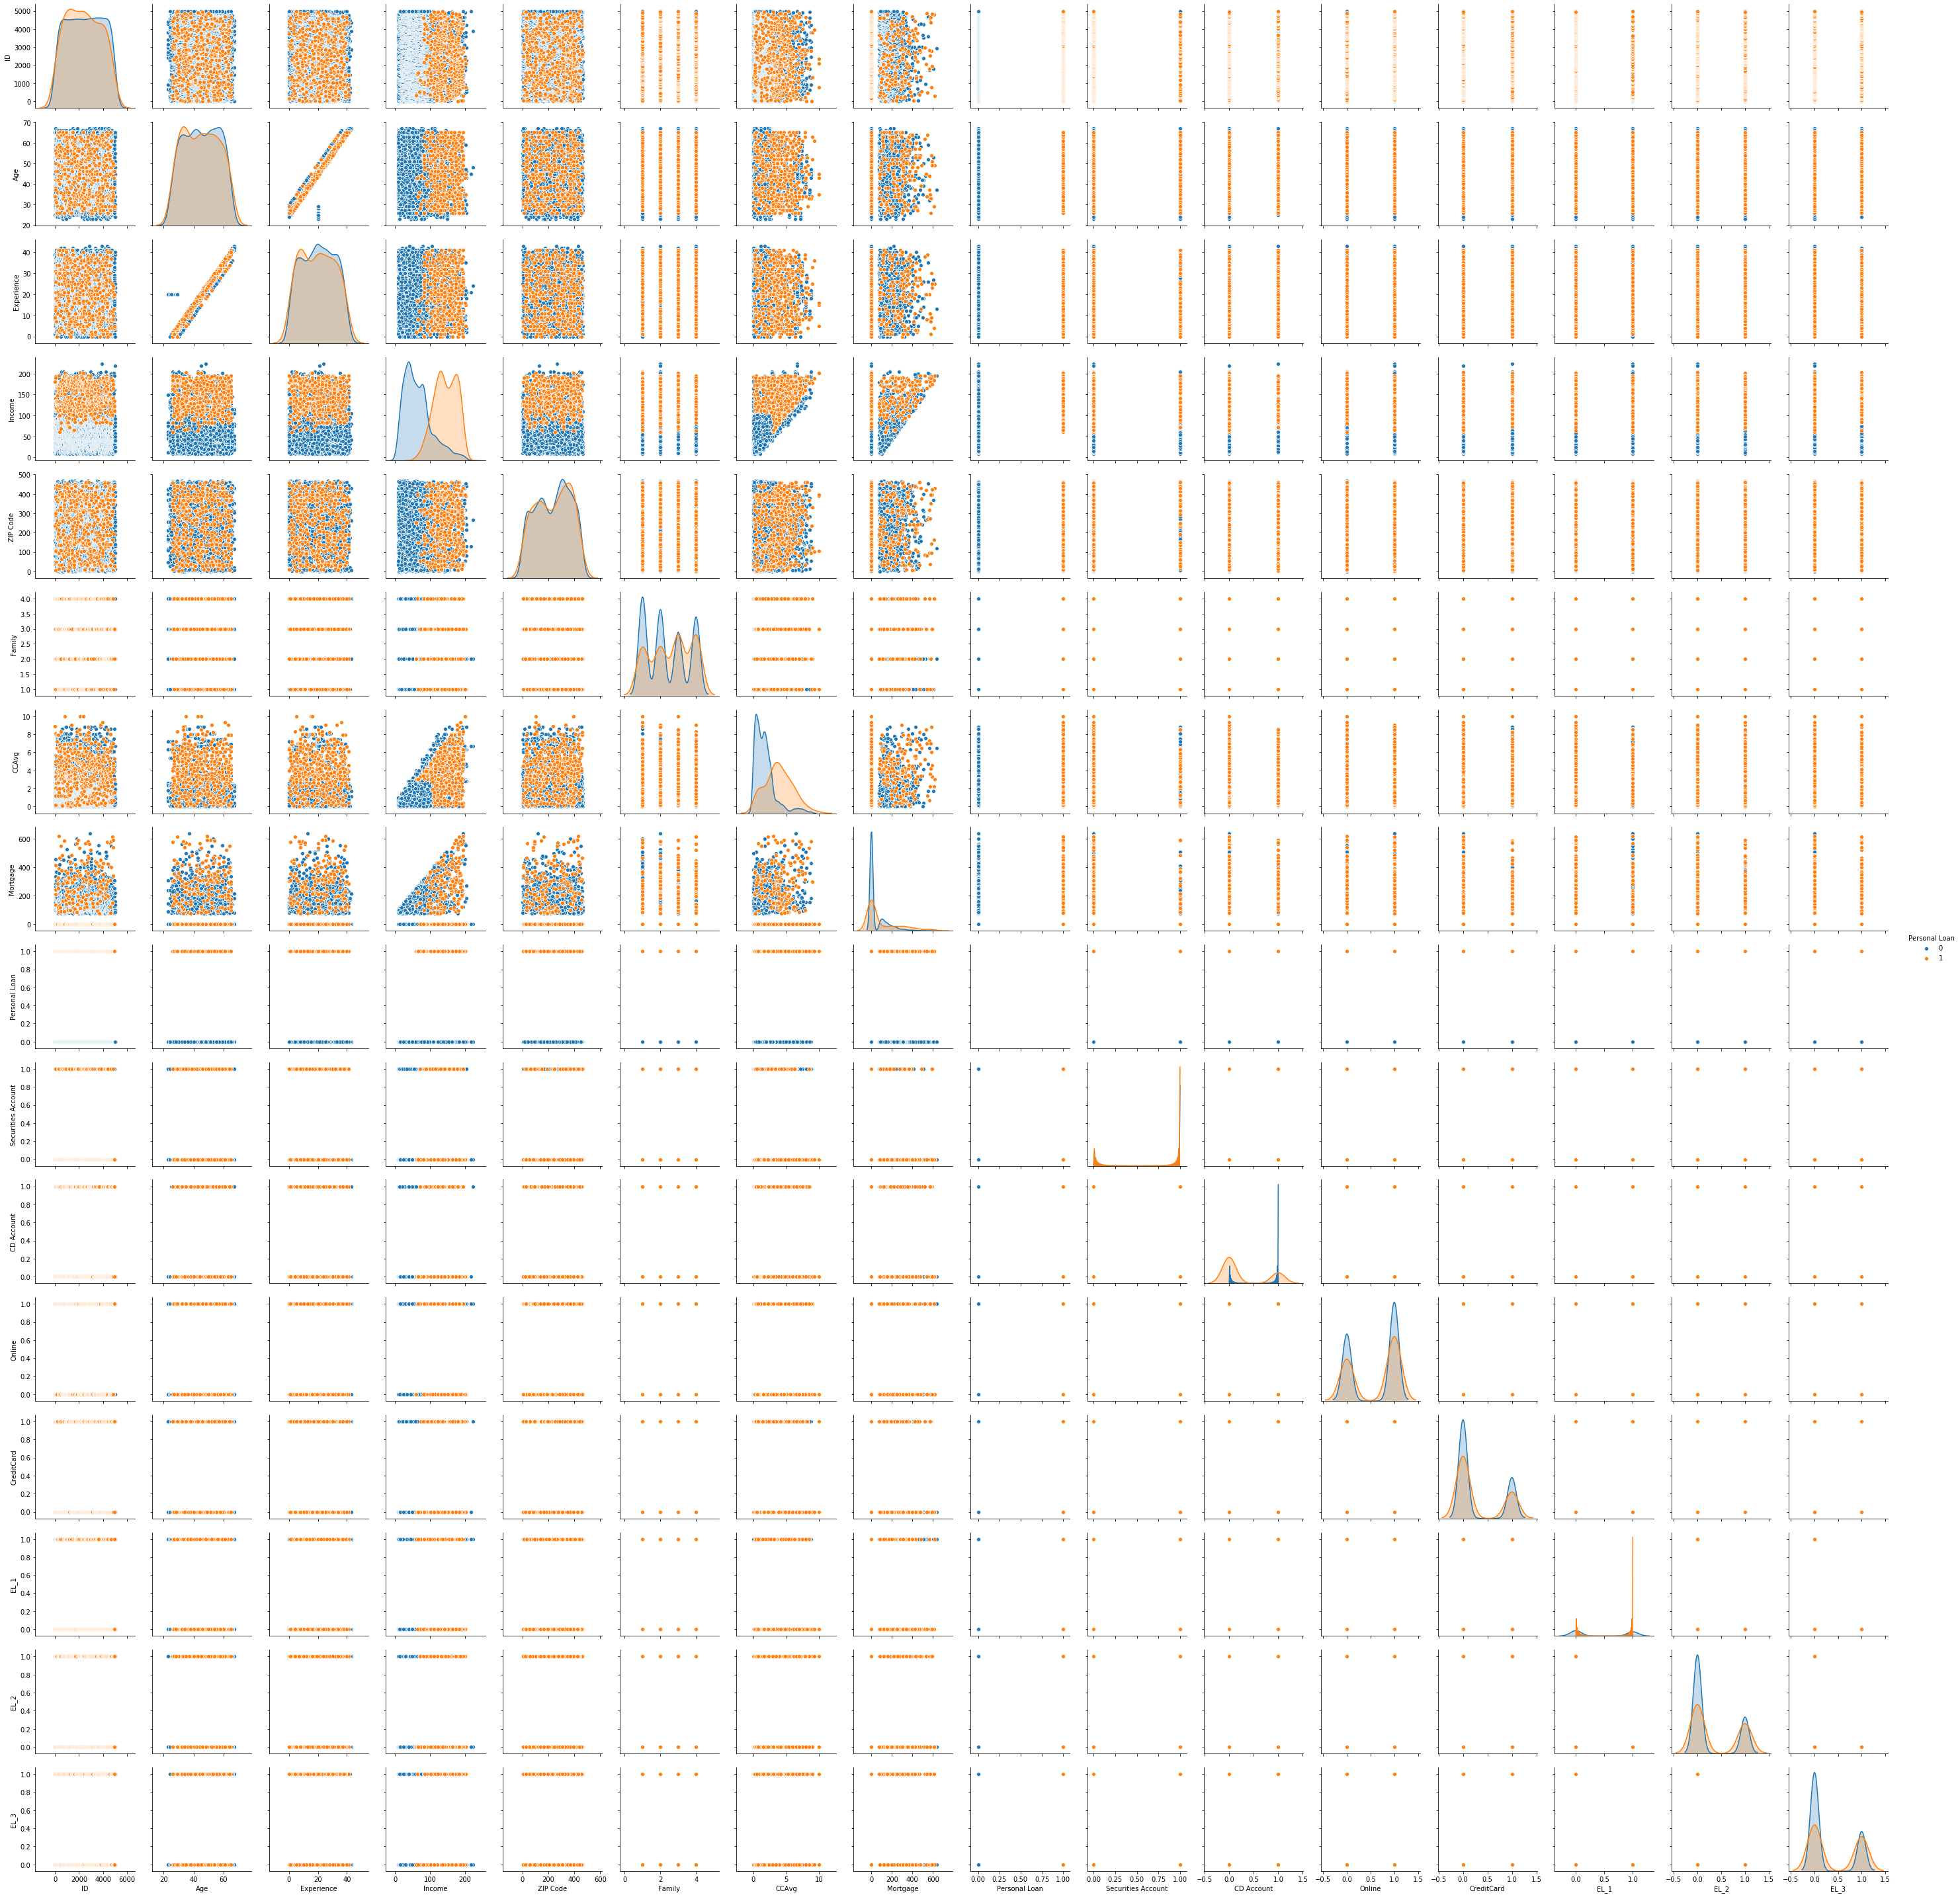

In [45]:
# 2.04 Pairplot Analysis
sns.pairplot(loan,hue='Personal Loan')

Inference: Age and experience have a positive linear relationship. Income vs Average spending on Credit Card and Income vs Mortgage also show positive liner relation. Personal loan's relationship with other attributes is mixed. Difficult to say if any relationship exists.

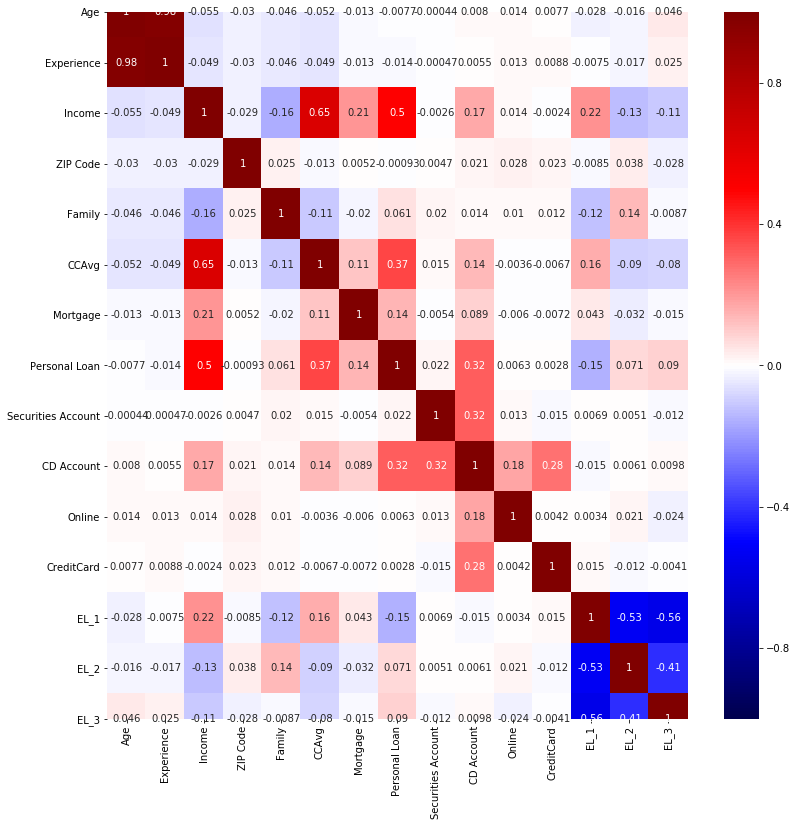

In [50]:
# 2.05 Correlation Plot

fig, ax = plt.subplots()
fig.set_size_inches(13,13)
sns.heatmap(loan[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'EL_1', 'EL_2', 'EL_3']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

Inference: We can see that there is high correlation between Age and Experience. Moderate correlation between Income and CCAvg.
For 'Personal Loan' it has moderate correlation with Income, CCAvg, Mortgage and CD Account. Correlation between Personal Loan and ZIP Code, Security Account, Online, CreditCard, EL_1, EL_2, EL_3 is poor, we will check with CHI-Square test to identify if categorical variables are dependent on each other, if not we will drop them.

In [51]:
# 2.06 Fit Test between 2 categorical variables - "Personal Loan" vs "ZIP Code"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont1 = pd.crosstab(loan["Personal Loan"],loan["ZIP Code"])

# Performing CHI Squared Test
chi2_contingency(cont1)

(444.15185491974455,
 0.7596677658976876,
 466,
 array([[9.04000e-01, 4.52000e+00, 5.42400e+00, 7.23200e+00, 2.71200e+00,
         1.80800e+00, 3.61600e+00, 4.52000e+00, 4.52000e+01, 1.71760e+01,
         2.71200e+00, 7.23200e+00, 4.52000e+00, 7.23200e+00, 8.13600e+00,
         1.80800e+01, 5.42400e+00, 6.32800e+00, 4.52000e+00, 9.04000e+00,
         1.80800e+00, 2.71200e+00, 3.61600e+00, 8.13600e+00, 2.71200e+00,
         5.42400e+00, 3.61600e+00, 1.26560e+01, 7.23200e+00, 5.42400e+00,
         9.04000e-01, 5.42400e+00, 5.42400e+00, 2.71200e+00, 4.15840e+01,
         6.41840e+01, 9.94400e+00, 7.23200e+00, 5.42400e+00, 4.52000e+00,
         4.52000e+01, 8.13600e+00, 6.32800e+00, 1.71760e+01, 1.80800e+00,
         4.52000e+00, 2.71200e+00, 1.44640e+01, 1.80800e+00, 1.62720e+01,
         1.80800e+00, 1.80800e+01, 4.52000e+00, 9.04000e+00, 5.42400e+00,
         7.23200e+00, 5.42400e+00, 2.71200e+00, 4.52000e+00, 3.61600e+00,
         1.80800e+00, 1.53680e+01, 4.52000e+00, 3.61600e+00, 2.7

Inference: Since the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. We will drop ZIP Code attribute

In [52]:
# 2.07 Test between 2 categorical variables - "Personal Loan" vs "Securities Account"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont2 = pd.crosstab(loan["Personal Loan"],loan["Securities Account"])

# Performing CHI Squared Test
chi2_contingency(cont2)

(2.172310545186504, 0.14051497326319357, 1, array([[4048.112,  471.888],
        [ 429.888,   50.112]]))

Inference: Since the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. We will drop Securities Account attribute.

In [53]:
# 2.8 Test between 2 categorical variables - "Personal Loan" vs "Online"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont3 = pd.crosstab(loan["Personal Loan"],loan["Online"])

# Performing CHI Squared Test
chi2_contingency(cont3)

(0.1560067212052492, 0.6928599643141485, 1, array([[1822.464, 2697.536],
        [ 193.536,  286.464]]))

Inference: Since the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. We will drop Online attribute.

In [54]:
# 2.08 Test between 2 categorical variables - "Personal Loan" vs "CreditCard"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont4 = pd.crosstab(loan["Personal Loan"],loan["CreditCard"])

# Performing CHI Squared Test
chi2_contingency(cont4)

(0.021144453920855056, 0.8843861223314504, 1, array([[3191.12, 1328.88],
        [ 338.88,  141.12]]))

Inference: Since the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. We will drop Credit Card attribute.

In [56]:
# 2.09 Test between 2 categorical variables - "Personal Loan" vs "Education Level 1"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont5 = pd.crosstab(loan["Personal Loan"],loan["EL_1"])

# Performing CHI Squared Test
chi2_contingency(cont5)

(109.82542328435063, 1.0701207224612922e-25, 1, array([[2625.216, 1894.784],
        [ 278.784,  201.216]]))

Inference: Since the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. We will not drop Education Level 1 attribute.

In [57]:
# 2.10 Test between 2 categorical variables - "Personal Loan" vs "Education Level 2"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont6 = pd.crosstab(loan["Personal Loan"],loan["EL_2"])

# Performing CHI Squared Test
chi2_contingency(cont6)

(25.01765646906518, 5.680771278053755e-07, 1, array([[3251.688, 1268.312],
        [ 345.312,  134.688]]))

Inference: Since the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. We will not drop Education Level 2 attribute.

In [58]:
# 2.11 Test between 2 categorical variables - "Personal Loan" vs "Education Level 3"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont7 = pd.crosstab(loan["Personal Loan"],loan["EL_3"])

# Performing CHI Squared Test
chi2_contingency(cont7)

(40.02553115383214, 2.5066507137326973e-10, 1, array([[3163.096, 1356.904],
        [ 335.904,  144.096]]))

Inference: Since the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. We will not drop Education Level 3 attribute.

In [59]:
# 2.12 Fit Test between 2 categorical variables - "Personal Loan" vs "CD Account"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont8 = pd.crosstab(loan["Personal Loan"],loan["CD Account"])

# Performing CHI Squared Test
chi2_contingency(cont8)

(495.90424218782334, 7.398297503329848e-110, 1, array([[4246.992,  273.008],
        [ 451.008,   28.992]]))

Inference: Since the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. We will not drop CD Account attribute.

Using Bivariate Analysis we can say that personal loan is a funtion of age, experience, income, family, CCAvg, Mortgage, CD Account, EL1, EL_2 and EL_3

## #3 Get the target column distribution.

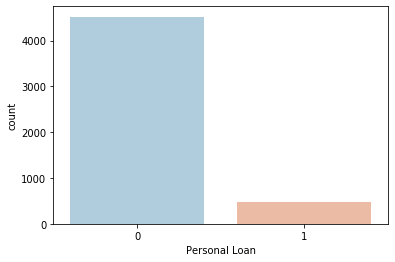

In [60]:
# 3.01 Target Column Distribution - 'Personal Loan' is Target Variable
sns.countplot(x ='Personal Loan',data = loan, palette = 'RdBu_r')

In [61]:
# 3.02 Data Distribution of 'Personal Loan' across all variables
loan.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,EL_1,EL_2,EL_3
Personal Loan,,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480


Inference: Target variable 'Personal Loan' is imbalanced i.e. One class dominates over other class.

## Outlier Analysis

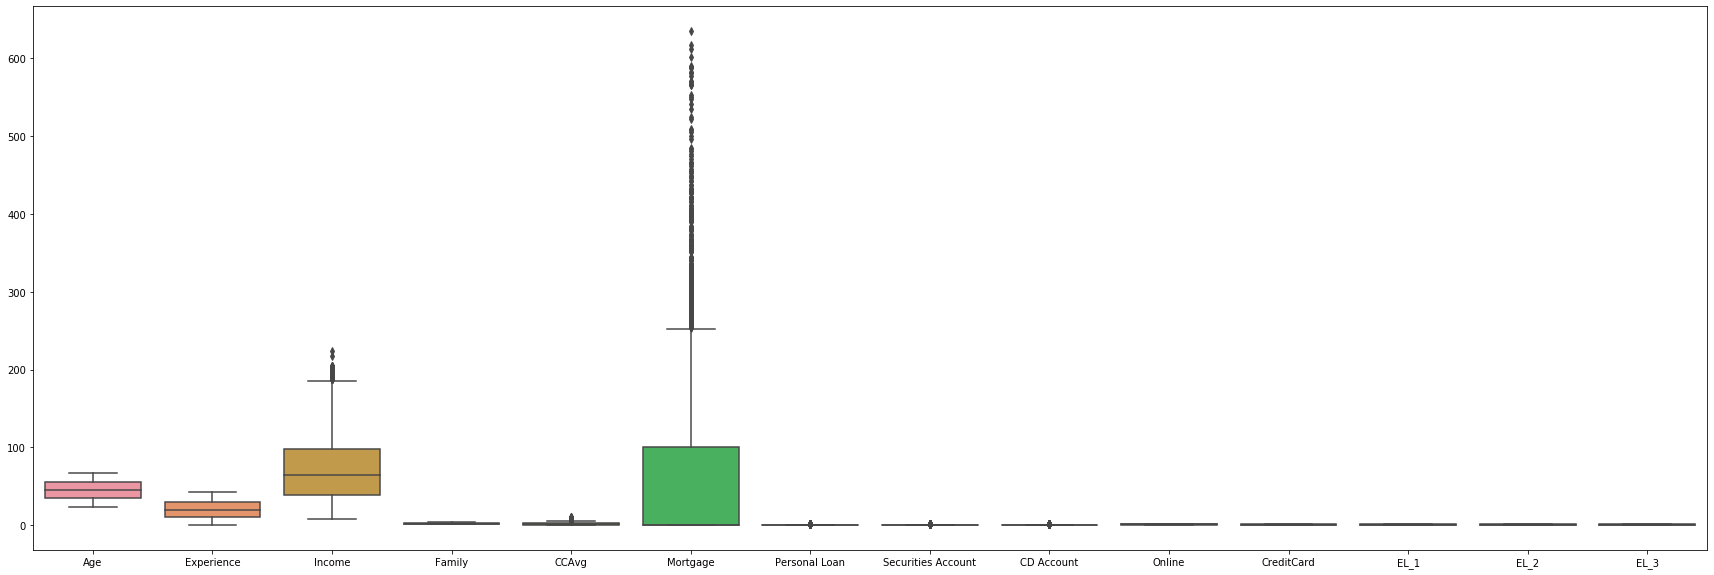

In [62]:
# BOXPLOT to see if there are any outliers in the attributes
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = loan[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard','EL_1','EL_2','EL_3']])

Inference: Outliers seen in Income and Mortgage. Treat outliers by replacing with max value

In [63]:
# Creating a Deep Copy of dataset named as 'load_wd', keeping loan for future reference
loan_wd = loan.copy(deep = True)

In [64]:
# Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = loan_wd[['Income','CCAvg','Mortgage']].quantile(0.25)
Q3 = loan_wd[['Income','CCAvg','Mortgage']].quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 Income       59.0
CCAvg         1.8
Mortgage    101.0
dtype: float64


In [65]:
# Rounding the Upper bound Outliers with Max Value
loan_wd.loc[loan_wd.Income > u_bound.Income, 'Income'] = u_bound.Income
loan_wd.loc[loan_wd.CCAvg > u_bound.CCAvg, 'CCAvg'] = u_bound.CCAvg
loan_wd.loc[loan_wd.Mortgage > u_bound.Mortgage, 'Mortgage'] = u_bound.Mortgage

In [66]:
# Rounding the Lower bound Outliers with Min Value
loan_wd.loc[loan_wd.Income < l_bound.Income, 'Income'] = l_bound.Income
loan_wd.loc[loan_wd.CCAvg < l_bound.CCAvg, 'CCAvg'] = l_bound.CCAvg
loan_wd.loc[loan_wd.Mortgage < l_bound.Mortgage, 'Mortgage'] = l_bound.Mortgage

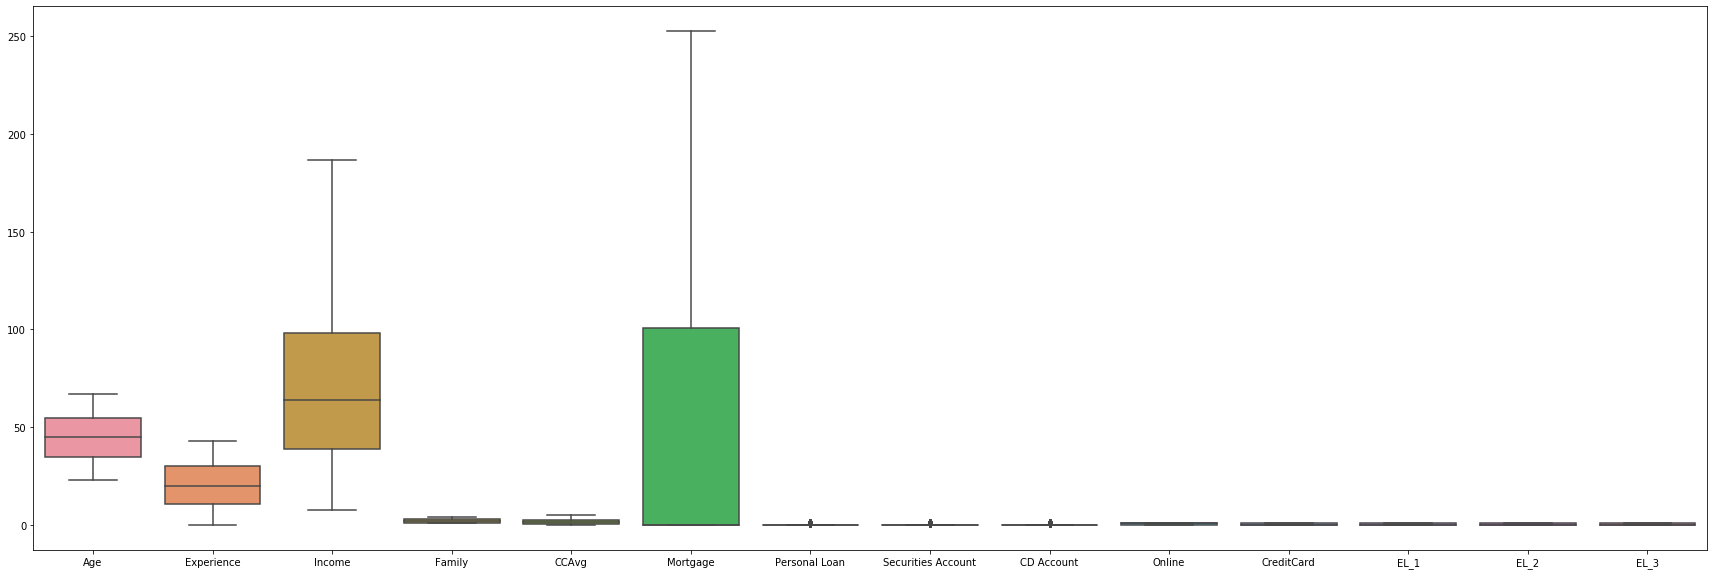

In [67]:
# BOXPLOT to see any other outliers
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = loan_wd[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard','EL_1','EL_2','EL_3']])

Inference: No More Outliers in the dataset. Proceed to building model

## #4 Split the data into training and test set in the ratio of 70:30 respectively

In [68]:
# 4.1 Seperate Dataset into Dependent and Independent Variable

# Dependent Variable
Y = loan_wd['Personal Loan']

# Independent Variable
X = loan_wd[['Age', 'Experience', 'Income','Family', 'CCAvg', 'Mortgage', 'CD Account','EL_1','EL_2', 'EL_3']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (5000,) 

Shape of Independent Variable:
 (5000, 10)


In [69]:
# 4.2 Splitting dataset into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables

# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=17)

# Shape of training and test set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (3500, 10)
Shape of X Test:	 (1500, 10)
Shape of Y Train:	 (3500,)
Shape of Y Test:	 (1500,)


## #5 & #6 Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans. Print the confusion matrix for all the above models

### #5.1 Logistic Regression

In [70]:
# Logistic Regression Classifier
logmodel = LogisticRegression()

# Model building on training dataset
logmodel.fit(X_train, Y_train)

# Prediction
lr_predict = logmodel.predict(X_test)

In [71]:
# Accuracy of Model
print("Accuracy on Training Set with Logistic Regression:",logmodel.score(X_train,Y_train))
print("Accuracy on Testing Set with Logistic Regression:",logmodel.score(X_test,Y_test))

# Confusion Matrix for Logistic Regression Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, lr_predict))

Accuracy on Training Set with Logistic Regression: 0.9608571428571429
Accuracy on Testing Set with Logistic Regression: 0.964


,0,1
0,1343,8
1,46,103


### #5.2 K-Nearest Neighbour

Onservation: To fit KNN algorithm on dataset we need to scale the independent variables

In [72]:
# Scaling the Data
XZ = X.apply(stats.zscore)

# Dividing the dataset into train and test sets
XZ_train, XZ_test, Y_train, Y_test = train_test_split(XZ, Y, test_size=0.3, random_state=17)

# Shape of training and test set
print("Shape of X Train:\t",XZ_train.shape)
print("Shape of X Test:\t",XZ_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (3500, 10)
Shape of X Test:	 (1500, 10)
Shape of Y Train:	 (3500,)
Shape of Y Test:	 (1500,)


In [114]:
knn = KNeighborsClassifier(n_neighbors = 3 , weights = 'uniform', metric='euclidean')

# Model building on training dataset
knn.fit(XZ_train,Y_train)

# Prediction
knn_predict = knn.predict(XZ_test)

In [115]:
# Print accuracy
print("Accuracy of training model is:", knn.score(XZ_train,Y_train))
print("Accuracy of testing model is :", knn.score(XZ_test,Y_test))

Accuracy of training model is: 0.9851428571428571
Accuracy of testing model is : 0.968


Inference: Accuracy of 96.8% with 3 nearest neighbours.Verifying the confusion matrix

In [116]:
# Confusion Matrix for kNN Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, knn_predict))

,0,1
0,1346,5
1,43,106


### #5.3 Naive Bayes

In [80]:
# Naive Bayes Classifier
nbayes = GaussianNB()

# Model building on training dataset
nbayes.fit(X_train, Y_train)

# Prediction
nbayes_predict = nbayes.predict(X_test)

In [81]:
# Accuracy of Model
print("Accuracy on Training Set with Naive Bayes Classifier:",nbayes.score(X_train,Y_train))
print("Accuracy on Testing Set with Naive Bayes Classifier:",nbayes.score(X_test,Y_test))

# Confusion Matrix for kNN Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, nbayes_predict))

Accuracy on Training Set with Naive Bayes Classifier: 0.9145714285714286
Accuracy on Testing Set with Naive Bayes Classifier: 0.9226666666666666


,0,1
0,1279,72
1,44,105


## #7 Accuracy with Models

1. Logarithmic Model = 96.4

2. KNN Model = 96.8

3. Naive Bayes Model = 92.2

Inference: We can conclude the KNN is the best classifier to be used for Thera Bank to identify potential loan customers.